In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_feat = pd.read_csv("../data/features/stoich120_fingerprints.csv")
df_label = pd.read_csv("../data/qmof.csv")

/var/folders/gt/tsyp2wjd1ng0pkr1tf52kn600000gn/T/ipykernel_2860/935934401.py:2: DtypeWarning: Columns (41,42,44,45,46,47,48,50,51,52,53,54,56,57,58,66,67,68,69,70,78,79,80,81,82,90,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_label = pd.read_csv("../data/qmof.csv")


In [40]:
df_feat.describe()

,H fraction,He fraction,Li fraction,Be fraction,B fraction,C fraction,N fraction,O fraction,F fraction,Ne fraction,...,range Electronegativity,mean Electronegativity,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
count,20375.000000,20375.0,20375.000000,20375.000000,20375.000000,20375.000000,20375.000000,20375.000000,20375.000000,20375.0,...,20375.000000,20375.000000,20375.000000,20375.000000,20375.000000,20375.000000,20375.000000,20375.000000,20375.000000,20375.000000
mean,0.321440,0.0,0.000713,0.000003,0.000275,0.380181,0.082267,0.147138,0.005951,0.0,...,1.798695,2.586952,1.665693,1.735129,0.336231,0.048865,0.447346,0.458901,0.082557,0.011195
std,0.088337,0.0,0.007023,0.000299,0.004973,0.094124,0.085400,0.106124,0.028427,0.0,...,0.388236,0.099030,0.090826,0.321816,0.364665,0.155874,0.049622,0.050990,0.073237,0.032674
min,0.000000,0.0,0.000000,0.000000,0.000000,0.036364,0.000000,0.000000,0.000000,0.0,...,0.360000,2.248333,1.315789,0.666667,0.000000,0.000000,0.174699,0.219512,0.000000,0.000000
25%,0.270833,0.0,0.000000,0.000000,0.000000,0.322581,0.026316,0.074074,0.000000,0.0,...,1.540000,2.520952,1.611111,1.516129,0.113208,0.000000,0.419643,0.435115,0.034014,0.000000
50%,0.324324,0.0,0.000000,0.000000,0.000000,0.394366,0.061224,0.133333,0.000000,0.0,...,1.790000,2.574375,1.666667,1.688889,0.256410,0.000000,0.454545,0.459016,0.070423,0.000000
75%,0.375000,0.0,0.000000,0.000000,0.000000,0.448980,0.111111,0.212766,0.000000,0.0,...,2.060000,2.647076,1.717391,1.923077,0.434783,0.000000,0.481481,0.488479,0.112729,0.000000
max,0.648649,0.0,0.200000,0.038462,0.227273,0.655172,0.700000,0.583333,0.413793,0.0,...,3.190000,3.187586,2.000000,3.428571,4.375000,2.800000,0.666667,0.618421,0.543478,0.318182


In [7]:
df_label["outputs.pbe.bandgap"].describe()

count    20375.000000
mean         2.087369
std          1.131588
min          0.000131
25%          1.088290
50%          2.143179
75%          2.887478
max          6.445777
Name: outputs.pbe.bandgap, dtype: float64

(array([3.650e+02, 5.090e+02, 7.190e+02, 7.120e+02, 8.920e+02, 1.300e+03,
        7.550e+02, 6.380e+02, 6.890e+02, 7.330e+02, 7.930e+02, 8.030e+02,
        9.440e+02, 1.110e+03, 1.074e+03, 1.163e+03, 1.096e+03, 1.080e+03,
        1.056e+03, 9.200e+02, 7.490e+02, 5.120e+02, 3.210e+02, 2.000e+02,
        1.730e+02, 1.910e+02, 2.020e+02, 1.990e+02, 1.840e+02, 1.090e+02,
        7.600e+01, 3.900e+01, 2.400e+01, 1.800e+01, 9.000e+00, 1.100e+01,
        2.000e+00, 1.000e+00, 3.000e+00, 1.000e+00]),
 array([1.31000000e-04, 1.61272150e-01, 3.22413300e-01, 4.83554450e-01,
        6.44695600e-01, 8.05836750e-01, 9.66977900e-01, 1.12811905e+00,
        1.28926020e+00, 1.45040135e+00, 1.61154250e+00, 1.77268365e+00,
        1.93382480e+00, 2.09496595e+00, 2.25610710e+00, 2.41724825e+00,
        2.57838940e+00, 2.73953055e+00, 2.90067170e+00, 3.06181285e+00,
        3.22295400e+00, 3.38409515e+00, 3.54523630e+00, 3.70637745e+00,
        3.86751860e+00, 4.02865975e+00, 4.18980090e+00, 4.35094205e+00

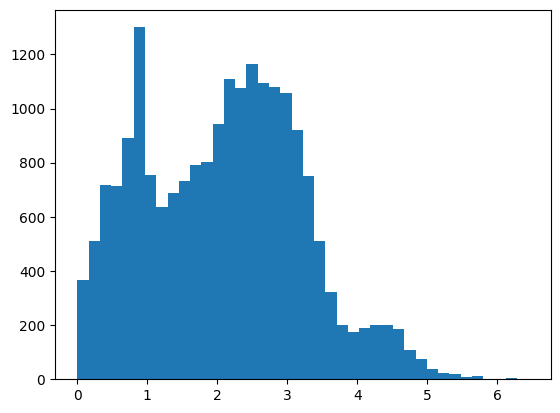

In [5]:
plt.hist(df_label["outputs.pbe.bandgap"], bins=40)

In [6]:
df_BG = pd.read_csv("../data/qmof.csv", index_col=["qmof_id"])['outputs.pbe.bandgap']

/var/folders/gt/tsyp2wjd1ng0pkr1tf52kn600000gn/T/ipykernel_3565/244358669.py:1: DtypeWarning: Columns (41,42,44,45,46,47,48,50,51,52,53,54,56,57,58,66,67,68,69,70,78,79,80,81,82,90,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_BG = pd.read_csv("../data/qmof.csv", index_col=["qmof_id"])['outputs.pbe.bandgap']


In [8]:
df_features = pd.read_csv("../data/features/stoich120_fingerprints.csv", index_col=0)

In [9]:
df_features

,H fraction,He fraction,Li fraction,Be fraction,B fraction,C fraction,N fraction,O fraction,F fraction,Ne fraction,...,range Electronegativity,mean Electronegativity,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons
MOF,,,,,,,,,,,,,,,,,,,,,
qmof-0000295,0.480000,0,0.000,0.0,0.0,0.280000,0.080000,0.120000,0.000000,0,...,1.54,2.502000,1.480000,1.280000,0.400000,0.0,0.468354,0.405063,0.126582,0.0
qmof-00019ff,0.345679,0,0.000,0.0,0.0,0.444444,0.098765,0.049383,0.000000,0,...,1.56,2.533333,1.654321,1.629630,0.580247,0.0,0.428115,0.421725,0.150160,0.0
qmof-0001b0d,0.371681,0,0.000,0.0,0.0,0.477876,0.017699,0.106195,0.000000,0,...,1.79,2.501239,1.628319,1.433628,0.238938,0.0,0.493298,0.434316,0.072386,0.0
qmof-0003ae4,0.250000,0,0.125,0.0,0.0,0.250000,0.000000,0.375000,0.000000,0,...,2.46,2.600000,1.625000,2.000000,0.000000,0.0,0.448276,0.551724,0.000000,0.0
qmof-000512e,0.050000,0,0.000,0.0,0.0,0.300000,0.200000,0.400000,0.000000,0,...,2.62,2.900000,1.900000,2.800000,0.000000,0.0,0.404255,0.595745,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
qmof-fff0df1,0.426471,0,0.000,0.0,0.0,0.367647,0.044118,0.132353,0.000000,0,...,1.54,2.521029,1.544118,1.397059,0.294118,0.0,0.477273,0.431818,0.090909,0.0
qmof-fff4e91,0.347826,0,0.000,0.0,0.0,0.434783,0.000000,0.173913,0.000000,0,...,1.79,2.543913,1.652174,1.565217,0.434783,0.0,0.452381,0.428571,0.119048,0.0
qmof-fffa2d9,0.285714,0,0.000,0.0,0.0,0.214286,0.000000,0.250000,0.000000,0,...,2.55,2.743929,1.714286,2.500000,0.000000,0.0,0.406780,0.593220,0.000000,0.0


In [16]:
df_BG = pd.read_csv("../data/qmof.csv", index_col="qmof_id")['outputs.pbe.bandgap']
df_BG

/var/folders/gt/tsyp2wjd1ng0pkr1tf52kn600000gn/T/ipykernel_3565/4099768117.py:1: DtypeWarning: Columns (41,42,44,45,46,47,48,50,51,52,53,54,56,57,58,66,67,68,69,70,78,79,80,81,82,90,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_BG = pd.read_csv("../data/qmof.csv", index_col="qmof_id")['outputs.pbe.bandgap']


qmof_id
qmof-8a95c27    0.632527
qmof-019ba28    1.134232
qmof-830ed1c    0.345448
qmof-5bd4a24    0.342645
qmof-644aab4    1.973007
                  ...   
qmof-7aebbbb    2.692705
qmof-9a04c15    3.326284
qmof-0dce90f    3.383629
qmof-955fe88    0.660589
qmof-6538047    2.348021
Name: outputs.pbe.bandgap, Length: 20375, dtype: float64

In [12]:
df = pd.concat([df_features, df_BG], axis=1, sort=True)
df = df.dropna()
refcodes = df.index

In [17]:
df["outputs.pbe.bandgap"]

qmof-0000295    0.910040
qmof-00019ff    1.495730
qmof-0001b0d    0.576819
qmof-0003ae4    4.561473
qmof-000512e    1.997112
                  ...   
qmof-fff0df1    0.500609
qmof-fff4e91    3.045254
qmof-fffa2d9    3.315889
qmof-fffd0e2    2.166898
qmof-fffeb7b    3.511348
Name: outputs.pbe.bandgap, Length: 20375, dtype: float64

In [14]:
refcodes

Index(['qmof-0000295', 'qmof-00019ff', 'qmof-0001b0d', 'qmof-0003ae4',
       'qmof-000512e', 'qmof-00052d0', 'qmof-0006638', 'qmof-000741d',
       'qmof-00089fc', 'qmof-0009829',
       ...
       'qmof-ffe63dd', 'qmof-ffe6994', 'qmof-ffeae31', 'qmof-ffed86d',
       'qmof-ffeef76', 'qmof-fff0df1', 'qmof-fff4e91', 'qmof-fffa2d9',
       'qmof-fffd0e2', 'qmof-fffeb7b'],
      dtype='object', length=20375)